In [ ]:
!pip install langchain langgraph cassio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.4/142.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 kB 8.0 MB/s eta 0:00:00


In [ ]:
import cassio  # Library for connecting to Astra DB

# Astra DB Connection Details
ASTRA_DB_APPLICATION_TOKEN = "AstraCS:LQqvrwQaFGZXxXCwuOPOoakp:b57cd8c3e1b696ca646683a0fee5e237b917133f1b7aee41c007bf70811f53f7"
# Token required for authentication with Astra DB

ASTRA_DB_ID = "35097929-ac6e-4511-a980-513d1dd12048"
# Unique database identifier for Astra DB

# Initializing connection to Astra DB
cassio.init(token=ASTRA_DB_APPLICATION_TOKEN, database_id=ASTRA_DB_ID)
# This function establishes a connection with Astra DB using the provided credentials.


In [ ]:
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.9 MB/s eta 0:00:00


In [ ]:
!pip install -U tiktoken langchain-groq langchainhub langchain_huggingface

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader

# List of URLs to index (These are blog posts related to AI and LLMs)
urls = [
    "https://lilianweng.github.io/posts/2023-06-23-agent/",  # Multi-agent systems
    "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/",  # Prompt engineering techniques
    "https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/",  # Adversarial attacks on LLMs
]

# Load documents from the given URLs
docs = [WebBaseLoader(url).load() for url in urls]

# Flatten the nested list structure into a single list of documents
docs_list = [item for sublist in docs for item in sublist]

# Initialize a text splitter with a tokenizer from Tiktoken
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=500,  # Maximum size of each text chunk
    chunk_overlap=0  # No overlap between consecutive chunks
)

# Split the loaded documents into smaller chunks
doc_splits = text_splitter.split_documents(docs_list)

# Now 'doc_splits' contains smaller chunks of the text that can be used for indexing or processing

In [ ]:
doc_splits

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final resu

In [ ]:
# Import the Hugging Face embeddings module from LangChain
from langchain_huggingface import HuggingFaceEmbeddings

# Initialize the embeddings model using a pre-trained Hugging Face transformer
embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Import the Cassandra vector store module from LangChain
from langchain.vectorstores.cassandra import Cassandra

# Initialize the Astra DB vector store with Hugging Face embeddings
astra_vector_store = Cassandra(
    embedding=embeddings,    # Use the previously defined Hugging Face embedding model
    table_name="qa_mini_demo",  # Table name for storing vector embeddings
    session=None,  # Database session (should be initialized separately)
    keyspace=None  # Keyspace (database namespace in Cassandra, should be set properly)
)

# The 'session' and 'keyspace' parameters should be initialized with Astra DB's connection settings
# Ensure that Astra DB is properly configured before using this vector store

In [ ]:
from langchain.indexes.vectorstore import VectorStoreIndexWrapper

# Add the split documents (chunks) into the Astra DB vector store
astra_vector_store.add_documents(doc_splits)

# Print confirmation of the number of inserted documents
print("Inserted %i document chunks into the vector store." % len(doc_splits))

# Create an index wrapper for easy retrieval and search operations
astra_vector_index = VectorStoreIndexWrapper(vectorstore=astra_vector_store)

# Now, 'astra_vector_index' can be used for similarity search and querying the stored documents

Inserted 88 document chunks into the vector store.


In [ ]:
# Create a retriever from the Astra DB vector store
retriever = astra_vector_store.as_retriever()

# Query the retriever with the question: "What is agent?"
response = retriever.invoke("What is agent", ConsistencyLevel="LOCAL_ONE")

# Print the retrieved response
print(response)

[Document(id='34cc7665b12449cf9f392d2837102e09', metadata={'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context lear

In [ ]:
from typing import Literal
from langchain_core.prompts import ChatPromptTemplate
from pydantic import BaseModel, Field

# Step 1: Define a Data Model for Routing
class RouteQuery(BaseModel):
    """
    Data model to route a user query to the most relevant data source.
    """
    datasource: Literal["vectorstore", "wiki_search"] = Field(
        ...,
        description="Given a user question, choose to route it to Wikipedia or a vectorstore."
    )


In [ ]:
from google.colab import userdata
from langchain_groq import ChatGroq
import os

# Step 2: Set Up the LLM with Function Calling
# Retrieve API key from Google Colab user data storage
# (Ensure that 'groq_api_key' is set in your Colab environment beforehand)
groq_api_key = userdata.get('groq_api_key')


# Initialize the language model with the selected model\llm = ChatGroq(groq_api_key=groq_api_key, model_name="Gemma2-9b-It")
llm = ChatGroq(groq_api_key=groq_api_key, model_name="gemma2-9b-it")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x797e32e0fad0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x797e350e7d90>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [ ]:
# Configure the LLM to return structured output matching the RouteQuery model
structured_llm_router = llm.with_structured_output(RouteQuery)

In [ ]:
# Step 3: Define a System Prompt for Routing Logic
system_prompt = """
You are an expert at routing a user question to a vectorstore or Wikipedia.
The vectorstore contains documents related to agents, prompt engineering, and adversarial attacks.
Use the vectorstore for questions on these topics. Otherwise, use wiki-search.
"""

# Step 4: Create a Chat Prompt Template
route_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        ("human", "{question}"),
    ]
)

# Step 5: Combine the Prompt with the Structured LLM Router
question_router = route_prompt | structured_llm_router

# Step 6: Test the Routing Logic with Sample Queries
print(question_router.invoke({"question": "Who is Shahrukh Khan?"}))
print(question_router.invoke({"question": "What are the types of agent memory?"}))

datasource='wiki_search'
datasource='vectorstore'


In [ ]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=e69e33d87bbc4cb9ffe65d78453e9e3267c8fd007f741ba54639b98ad4378984
  Stored in directory: /root/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
Successfully built wikipedia


In [ ]:
from langchain_community.utilities import WikipediaAPIWrapper
from langchain_community.tools import WikipediaQueryRun

# Configure the Wikipedia API wrapper
api_wrapper = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max=200)

# Initialize Wikipedia query tool
wiki = WikipediaQueryRun(api_wrapper=api_wrapper)

In [ ]:
wiki.run("Who is Sharukh Khan?")

'Page: Shah Rukh Khan\nSummary: Shah Rukh Khan (pronounced [ˈʃaːɦɾʊx xäːn] ; born 2 November 1965), also known by the initialism SRK, is an Indian actor and film producer who works in Hindi cinema. Refe'

In [ ]:
# Build an AI Agent

from typing import List
from typing_extensions import TypedDict

# Step 1: Define GraphState
class GraphState(TypedDict):
    """
    Represents the state of our graph.

    Attributes:
        question: User's query
        generation: Response generated by the LLM
        documents: List of relevant documents retrieved
    """
    question: str
    generation: str
    documents: List[str]

In [ ]:
from langchain.schema import Document

def retrieve(state: dict) -> dict:
    """
    Retrieve documents related to the question.

    Args:
        state (dict): The current graph state

    Returns:
        dict: Updated state with retrieved documents
    """
    print("---RETRIEVE---")
    question = state["question"]

    # Perform retrieval
    documents = retriever.invoke(question)

    return {"documents": documents, "question": question}

In [ ]:
# def wiki_search(state):
#     """
#     Wiki search based on the re-phrased question.

#     Args:
#         state (dict): The current graph state

#     Returns:
#         state (dict): Updates documents key with appended web results
#     """
#     print("---WIKIPEDIA SEARCH---")
#     question = state["question"]
#     print(f"Question: {question}")

#     # Wiki search
#     docs = wiki.invoke({"query": question})
#     wiki_results = Document(page_content=docs)

#     # Ensure 'documents' key exists before appending
#     if "documents" not in state:
#         state["documents"] = []

#     state["documents"].append(wiki_results)

#     return {"documents": state["documents"], "question": question}

from langchain.tools import WikipediaQueryRun
from langchain.utilities import WikipediaAPIWrapper
from langchain.schema import Document

# Initialize Wikipedia tool once
wiki = WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper())

def wiki_search(state):
    """
    Wiki search using the question provided in the state dict.

    Args:
        state (dict): Dictionary with at least a 'question' key.

    Returns:
        dict: Updated state with 'documents' list and 'question'.
    """
    print("---WIKIPEDIA SEARCH---")

    question = state.get("question", "")
    print(f"Question: {question}")

    # Perform Wikipedia search
    docs = wiki.invoke({"query": question})
    print("Raw docs returned:", docs)

    # Normalize the result into a list of Document objects
    wiki_results = []
    if isinstance(docs, str):
        wiki_results = [Document(page_content=docs)]
    elif isinstance(docs, Document):
        wiki_results = [docs]
    elif isinstance(docs, list):
        wiki_results = [
            Document(page_content=d.page_content if isinstance(d, Document) else str(d))
            for d in docs
        ]
    else:
        wiki_results = [Document(page_content="No relevant Wikipedia info found.")]

    # Append to state
    if "documents" not in state:
        state["documents"] = []

    state["documents"].extend(wiki_results)

    return {"documents": state["documents"], "question": question}


In [ ]:
def route_question(state: dict) -> str:
    """
    Route question to either Wikipedia search or RAG-based retrieval.

    Args:
        state (dict): The current graph state

    Returns:
        str: The next node to call ("wiki_search" or "vectorstore")
    """

    print("---ROUTE QUESTION---")
    question = state["question"]

    # Invoke the routing logic
    source = question_router.invoke({"question": question})

    # Ensure `source` is a dictionary
    datasource = source.datasource if hasattr(source, "datasource") else source.get("datasource", "")

    if datasource == "wiki_search":
        print("---ROUTE QUESTION TO Wiki SEARCH---")
        return "wiki_search"
    elif datasource == "vectorstore":
        print("---ROUTE QUESTION TO RAG---")
        return "vectorstore"

    # Fallback in case of unexpected results
    print("---UNKNOWN ROUTE, DEFAULTING TO VECTORSTORE---")
    return "vectorstore"


In [ ]:
from langgraph.graph import END, StateGraph, START

# Initialize workflow with the defined graph state
workflow = StateGraph(GraphState)

# Define the processing nodes
workflow.add_node("wiki_search", wiki_search)  # Wikipedia search
workflow.add_node("retrieve", retrieve)  # Vectorstore retrieval

# Define the routing logic
workflow.add_conditional_edges(
    START,
    route_question,
    {
        "wiki_search": "wiki_search",
        "vectorstore": "retrieve",
    },
)

# Define end conditions
workflow.add_edge("retrieve", END)
workflow.add_edge("wiki_search", END)

# Compile the workflow
app = workflow.compile()

print("Graph workflow compiled successfully!")

Graph workflow compiled successfully!


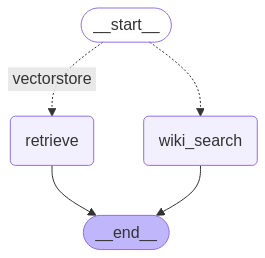

In [ ]:
from IPython.display import Image, display

try:
    # Attempt to visualize the workflow graph
    graph_image = app.get_graph().draw_mermaid_png()
    display(Image(graph_image))
except AttributeError:
    print("Error: Method `draw_mermaid_png()` is not available.")
except ImportError:
    print("Error: Missing dependencies for rendering the graph.")
except Exception as e:
    print(f"Unexpected error: {e}")

In [ ]:
from pprint import pprint

# List of test questions
test_questions = [
    "What is an agent?",
    "What is prompt engineering?",
]

# Run multiple inputs
for question in test_questions:
    print(f"\n=== Query: {question} ===\n")
    inputs = {"question": question}

    for output in app.stream(inputs):
        for key, value in output.items():
            # Node
            pprint(f"Node '{key}':")
            # Optional: print full state at each node
            # pprint(value, indent=2, width=80, depth=None)

    pprint("\n---\n")

    # Print final retrieved document description if available
    if 'documents' in value and value['documents']:
        try:
            pprint(value['documents'][0].model_dump()['metadata']['description'])
        except (KeyError, AttributeError, IndexError):
            print("No description available for retrieved document.")



=== Query: What is an agent? ===

---ROUTE QUESTION---


---ROUTE QUESTION TO RAG---
---RETRIEVE---
"Node 'retrieve':"
'\n---\n'
('Building agents with LLM (large language model) as its core controller is a '
 'cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer '
 'and BabyAGI, serve as inspiring examples. The potentiality of LLM extends '
 'beyond generating well-written copies, stories, essays and programs; it can '
 'be framed as a powerful general problem solver.\n'
 'Agent System Overview\n'
 'In a LLM-powered autonomous agent system, LLM functions as the agent’s '
 'brain, complemented by several key components:\n'
 '\n'
 'Planning\n'
 '\n'
 'Subgoal and decomposition: The agent breaks down large tasks into smaller, '
 'manageable subgoals, enabling efficient handling of complex tasks.\n'
 'Reflection and refinement: The agent can do self-criticism and '
 'self-reflection over past actions, learn from mistakes and refine them for '
 'future steps, thereby improving the quality of final results.\n'
 '\n'
 '\n'


---ROUTE QUESTION TO RAG---
---RETRIEVE---
"Node 'retrieve':"
'\n---\n'
('Prompt Engineering, also known as In-Context Prompting, refers to methods '
 'for how to communicate with LLM to steer its behavior for desired outcomes '
 'without updating the model weights. It is an empirical science and the '
 'effect of prompt engineering methods can vary a lot among models, thus '
 'requiring heavy experimentation and heuristics.\n'
 'This post only focuses on prompt engineering for autoregressive language '
 'models, so nothing with Cloze tests, image generation or multimodality '
 'models. At its core, the goal of prompt engineering is about alignment and '
 'model steerability. Check my previous post on controllable text generation.')


In [ ]:
from pprint import pprint

# Run
inputs = {
    "question": "Avengers"
}
for output in app.stream(inputs):
    for key, value in output.items():
        # Node
        pprint(f"Node '{key}':")
        # Optional: print full state at each node
        # pprint.pprint(value["keys"], indent=2, width=80, depth=None)
    pprint("\n---\n")

# Final generation
pprint(value['documents'])

---ROUTE QUESTION---
---ROUTE QUESTION TO Wiki SEARCH---
---WIKIPEDIA SEARCH---
Question: Avengers
Raw docs returned: Page: Avengers: Endgame
Summary: Avengers: Endgame is a 2019 American superhero film based on the Marvel Comics superhero team the Avengers. Produced by Marvel Studios and distributed by Walt Disney Studios Motion Pictures, it is the direct sequel to Avengers: Infinity War (2018) and the 22nd film in the Marvel Cinematic Universe (MCU). Directed by Anthony and Joe Russo and written by Christopher Markus and Stephen McFeely, the film features an ensemble cast which includes Robert Downey Jr., Chris Evans, Mark Ruffalo, Chris Hemsworth, Scarlett Johansson, Jeremy Renner, Don Cheadle, Paul Rudd, Brie Larson, Karen Gillan, Danai Gurira, Benedict Wong, Jon Favreau, Bradley Cooper, Gwyneth Paltrow, and Josh Brolin. In the film, the surviving members of the Avengers and their allies attempt to reverse Thanos's actions in Infinity War which erased half of all life in the univer